In [1]:
import random
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab


In [2]:
#randx = [[random.uniform(0,10),random.uniform(0,10)] for x in nx]
#npx = np.array(origx)
#print randx

n = 20
from pylab import rand      # rand(d0, d1, ..., dn) Random values in a given shape. 
                            # Create an array of the given shape and propagate it with
                            # random samples from a uniform distribution over ``[0, 1)``.


xb = (rand(n)*2-1)/2-0.5
yb = (rand(n)*2-1)/2+0.5
xr = (rand(n)*2-1)/2+0.5
yr = (rand(n)*2-1)/2-0.5

inputs = []
print xb
for i in range(len(xb)):
    inputs.append([xb[i],yb[i],1])
    inputs.append([xr[i],yr[i],-1])

#print inputs

Xinputs = []
Yinputs = []

for i in range(len(inputs)):
    Xinputs.append([inputs[i][0],inputs[i][1]])
    Yinputs.append(inputs[i][2])
    
#print 'x  ', Xinputs
print 
print
#print 'y   ',Yinputs



[-0.64143354 -0.65115506 -0.72603896 -0.58759027 -0.70708848 -0.35098052
 -0.08791455 -0.27532963 -0.10947532 -0.67252779 -0.9151305  -0.50978425
 -0.90777916 -0.35019338 -0.21531513 -0.72867092 -0.37035562 -0.51218307
 -0.81225148 -0.91437814]




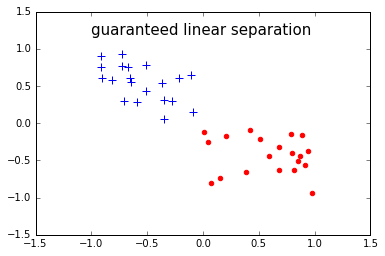

[[-0.64143354340468017, 0.54806670540119473, 1], [-0.65115506317846839, 0.60735537809219187, 1], [-0.72603895828662912, 0.76535288092665854, 1], [-0.58759026841147233, 0.28508754394790481, 1], [-0.70708847531869823, 0.29236185827103378, 1], [-0.35098051508798656, 0.054764938890144887, 1], [-0.087914553684647734, 0.15560219675369025, 1], [-0.27532962600222266, 0.29344283081887401, 1], [-0.10947531769525543, 0.64511818627676398, 1], [-0.67252779229207715, 0.7507156093587467, 1], [-0.91513050251018824, 0.90743388896373589, 1], [-0.50978425356881396, 0.78168336420953777, 1], [-0.90777916262365788, 0.60624715439350818, 1], [-0.35019337549218255, 0.31707237910410169, 1], [-0.21531512840726319, 0.61085076951579842, 1], [-0.72867091732275624, 0.92849117993752295, 1], [-0.37035562146092516, 0.53674181413206301, 1], [-0.51218307104886107, 0.43426094834730611, 1], [-0.81225147608460113, 0.57739815346877599, 1], [-0.91437814104106019, 0.76062944875114136, 1]]


In [3]:
b = []
r = []

for xi in inputs:
    if xi[2] > 0:
        b.append(xi)
    else:
        r.append(xi)

plt.scatter([x[0] for x in b], [x[1] for x in b],color='blue', marker='+', s=70)
plt.scatter([x[0] for x in r], [x[1] for x in r],color='red', marker='o')

plt.text(-1.0, 1.2,'guaranteed linear separation',fontsize=15)

plt.show()
print b

In [4]:
nx1 = rand(n)
nx2 = rand(n)
xr = zip(nx1*10, nx2*10)
print xr  # X input in the perceptron implementation

[(1.4340255498058041, 9.718610509914086), (0.59696268855026879, 0.058795739591658291), (7.975511879169991, 0.01280546349870626), (4.9698433829428907, 6.1219973577916846), (8.8441474789443486, 6.0847489983831817), (2.5495270771990519, 5.9611626140030669), (2.6428682246451385, 3.9501512792487912), (3.2937113843059951, 6.0025423784569334), (5.9732771081075731, 9.8312881313797398), (0.28270610695176002, 1.3954797348292769), (4.2816877409291854, 0.47946349550259781), (9.0866130435584811, 3.207793750749147), (9.0359240724774565, 4.0868072365706976), (9.6165384477621245, 8.8772421748087424), (1.4797644192835624, 8.866233516162902), (1.7856973660281339, 9.8983025035647749), (3.5962423863191129, 4.1832957493817258), (3.2491180576777245, 4.3100388109224799), (6.1146997199936752, 5.436868688437194), (3.8681340906065986, 3.194596648777972)]


In [5]:
b2 = []
r2 = []

#for pair in xr:
 #   if pair[1] > (0.7*pair[0]+2):
  #      b2.append(x)
   # else:
    #    r2.append(x)

print(xr[0])

inputs2 = []
for i in range(len(b2)+len(r2)):
    inputs2.append([b[i],b[i],1])
    inputs2.append([r[i],r[i],-1])
    
#print inputs2

plt.scatter([x[0] for x in b2], [x[1] for x in b2],color='green', marker='+', s=70)
plt.scatter([x[0] for x in r2], [x[1] for x in r2],color='red', marker='o')
plt.text(4, 11,'NOT guaranteed linear separation', horizontalalignment='center',verticalalignment='center', fontsize=15)
#plt.show()

(1.4340255498058041, 9.718610509914086)


In [6]:
#print inputs2

X2 = []
Y2 = []

for i in range(len(inputs2)):
    X2.append([inputs2[i][0],inputs2[i][1]])
    Y2.append(inputs2[i][2])
    
#print 'x2  ', Xinputs2
print 
print
#print 'y2   ',Yinputs2

In [7]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float - NOT USED
        Learning rate (between 0.0 and 1.0)
        n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
            X : {array-like}, shape = [n_samples, n_features]
                Training vectors, where n_samples
                is the number of samples and
                n_features is the number of features.
            y : array-like, shape = [n_samples]
                Target values.
        Returns
        -------
               self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
           
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #print "w ", self.w_, " target ", target, " self.predict(xi) ", self.predict(xi)
                update = self.eta * (target - self.predict(xi))
                #if update != 0.0:
                 #   print "update " , update, "xi ", xi, "w", self.w_
                self.w_[1:] += update * xi
                #print "update " , update, "xi ", xi, "w", self.w_, " update * xi ", update * xi
                self.w_[0] += update
                #print "update " , update, "xi ", xi, "w", self.w_
                errors += int(update != 0.0)
                #print errors
            self.errors_.append(errors)
        return self
        
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

In [8]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df[0].max()

7.9000000000000004

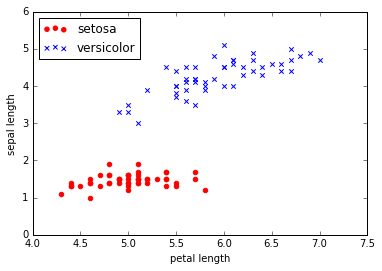

In [10]:
"""
extract the first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, 
and convert the class labels into the two integer class labels 1 (Versicolor) and -1 (Setosa) 
that we assign to a vector y where the values method of a pandas DataFrame yields 
the corresponding NumPy representation. 
"""

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

"""
Similarly, we extract the first feature column (sepal length) 
and the third feature column (petal length) 
of those 100 training samples and assign them to a feature matrix X, 
which we can visualize via a two-dimensional scatter plot:
"""
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')

plt.show()

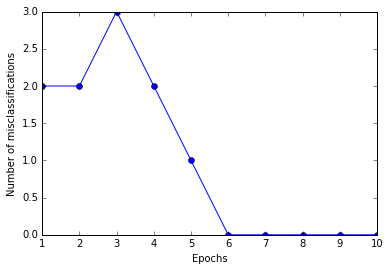

In [11]:
"""
Now we train our perceptron algorithm on the Iris data subset that we just extracted. 
Also, we will plot the misclassification error for each epoch to check if the algorithm converged and
found a decision boundary that separates the two Iris  ower classes:
"""
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()


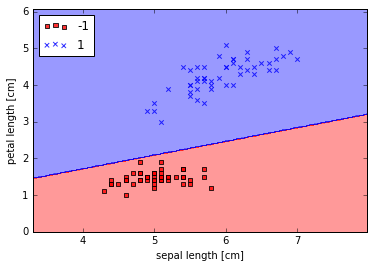

In [12]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #print Z
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

0.198363303058
ww [-0.2016502  -0.34280534  0.91750842]


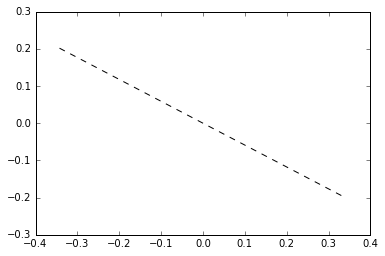

In [13]:
# testing how to add a line


from pylab import rand,plot,show,norm

# plot of the separation line.
# The separation line is orthogonal to w
n = norm(ppn.w_)
print n

# checking the calculation of the norm
#print (perceptron.w[0]**2 +  perceptron.w[1]**2)**0.5

ww = ppn.w_/n
print "ww", ww
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plt.plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
plt.show()

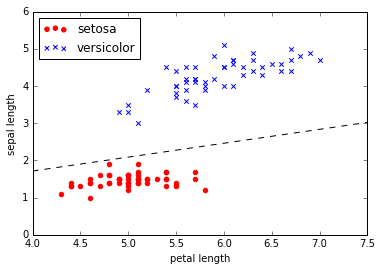

In [14]:
# printing the dataset and the separation line

X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')

x1a = []
x2a = []

for x1 in range(4, 9):
    x2 = ((-ww[1]*x1)-ww[0])/ww[2]
    x1a.append(x1)
    x2a.append(x2)

x1,x2,X,y = plt.axis()

plt.axis((x1,x2,0,6))

# print x1a, x2a
plt.plot(x1a, x2a,'--k')

#%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

plt.show()

In [15]:
# a second implementation - using barx
ppn2 = Perceptron(eta=0.01, n_iter=10)
ppn2.fit(barx, y2)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

NameError: name 'barx' is not defined

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()
